In [1]:
import pandas as pd

mouse = pd.read_csv('Mouse_metadata.csv')
study = pd.read_csv('Study_results.csv')

merged_df = pd.merge(mouse, study, on='Mouse ID', how='left')

merged_df.to_csv('new_file.csv', index=False)

merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
unique_mouse_ids = merged_df['Mouse ID'].unique()
print(unique_mouse_ids)

['k403' 's185' 'x401' 'm601' 'g791' 's508' 'f966' 'm546' 'z578' 'j913'
 'u364' 'n364' 'y793' 'r554' 'm957' 'c758' 't565' 'a644' 'i177' 'j989'
 'i738' 'a520' 'w914' 'r811' 'g288' 'i334' 'q610' 'd251' 'l897' 'c458'
 'b742' 'b128' 'j246' 'a411' 'j119' 'w150' 'v923' 'g316' 's710' 'l509'
 'r944' 'e662' 'u196' 'q597' 'a444' 'i557' 'r921' 'w678' 'y449' 'a203'
 'a251' 'a262' 'a275' 'a366' 'a401' 'a457' 'a492' 'a577' 'a685' 'a699'
 'a788' 'a818' 'a897' 'a963' 'b313' 'b447' 'b487' 'b559' 'b759' 'b879'
 'c139' 'c264' 'c282' 'c302' 'c326' 'c402' 'c559' 'c580' 'c757' 'c766'
 'c819' 'c832' 'c895' 'c927' 'd133' 'd164' 'd474' 'e213' 'e227' 'e291'
 'e476' 'e584' 'f129' 'f234' 'f278' 'f345' 'f394' 'f436' 'f545' 'f932'
 'f993' 'g107' 'g296' 'g497' 'g558' 'g570' 'g867' 'g989' 'h246' 'h333'
 'h428' 'h531' 'i386' 'i477' 'i635' 'i669' 'i901' 'j235' 'j296' 'j365'
 'j755' 'j984' 'k210' 'k382' 'k483' 'k510' 'k603' 'k754' 'k804' 'k862'
 'k894' 'l215' 'l264' 'l471' 'l490' 'l558' 'l661' 'l700' 'l725' 'l733'
 'l872

In [3]:
for mouse_id in unique_mouse_ids:
    duplicate_timepoints = merged_df[merged_df['Mouse ID'] == mouse_id]['Timepoint'].duplicated().any()
    if duplicate_timepoints:
        print(f"Mouse ID {mouse_id} has duplicate time points.")
    else:
        print(f"Mouse ID {mouse_id} does not have duplicate time points.")

Mouse ID k403 does not have duplicate time points.
Mouse ID s185 does not have duplicate time points.
Mouse ID x401 does not have duplicate time points.
Mouse ID m601 does not have duplicate time points.
Mouse ID g791 does not have duplicate time points.
Mouse ID s508 does not have duplicate time points.
Mouse ID f966 does not have duplicate time points.
Mouse ID m546 does not have duplicate time points.
Mouse ID z578 does not have duplicate time points.
Mouse ID j913 does not have duplicate time points.
Mouse ID u364 does not have duplicate time points.
Mouse ID n364 does not have duplicate time points.
Mouse ID y793 does not have duplicate time points.
Mouse ID r554 does not have duplicate time points.
Mouse ID m957 does not have duplicate time points.
Mouse ID c758 does not have duplicate time points.
Mouse ID t565 does not have duplicate time points.
Mouse ID a644 does not have duplicate time points.
Mouse ID i177 does not have duplicate time points.
Mouse ID j989 does not have dup

In [7]:
unique_drug_regimen = merged_df['Drug Regimen'].unique()
print(unique_drug_regimen)

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


In [13]:
drug_regimen_means = filtered_df.groupby('Drug Regimen').agg({

    'Age_months': 'mean',
    'Sex': lambda x: x.mode().iloc[0],
    'Weight (g)': 'mean'
})

print(drug_regimen_means)



Empty DataFrame
Columns: [Age_months, Sex, Weight (g)]
Index: []


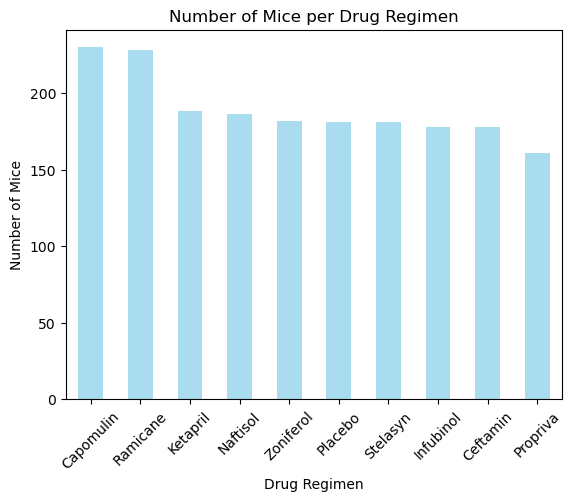

In [21]:
import matplotlib.pyplot as plt
drug_regimen_counts = merged_df['Drug Regimen'].value_counts()


drug_regimen_counts.plot(kind='bar', color='skyblue', alpha=0.7)


plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Number of Mice per Drug Regimen')


plt.xticks(rotation=45)


plt.show()


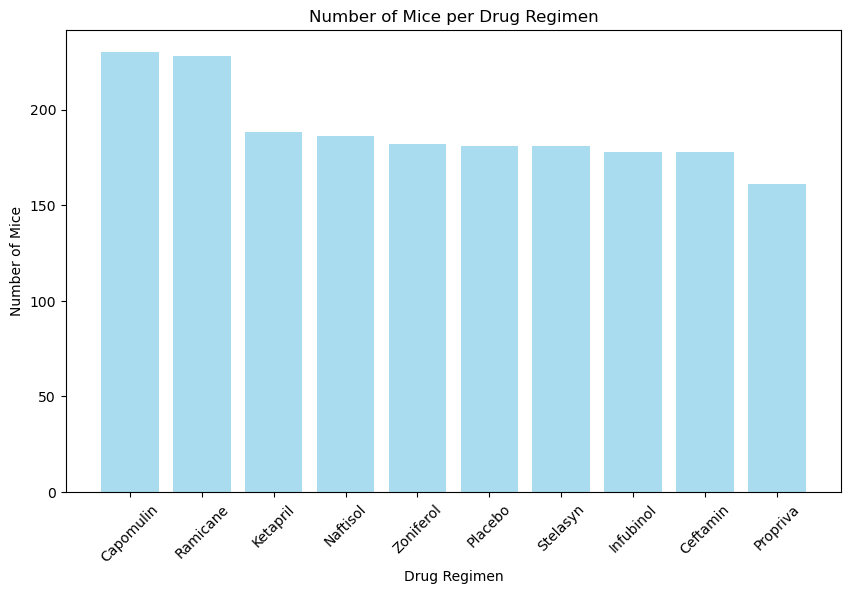

In [22]:

import matplotlib.pyplot as plt

mouse = pd.read_csv('Mouse_metadata.csv')
study = pd.read_csv('Study_results.csv')
merged_df = pd.merge(mouse, study, on='Mouse ID', how='left')

drug_regimen_counts = merged_df['Drug Regimen'].value_counts()

drug_regimens = drug_regimen_counts.index
counts = drug_regimen_counts.values


plt.figure(figsize=(10, 6))  
plt.bar(drug_regimens, counts, color='skyblue', alpha=0.7)


plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Number of Mice per Drug Regimen')


plt.xticks(rotation=45)

plt.show()


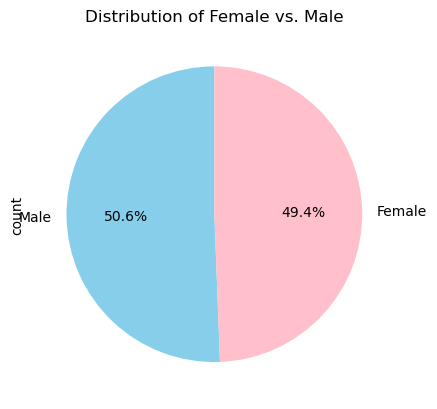

In [30]:

import matplotlib.pyplot as plt

mouse = pd.read_csv('Mouse_metadata.csv')
study = pd.read_csv('Study_results.csv')
merged_df = pd.merge(mouse, study, on='Mouse ID', how='left')

sex_counts = merged_df['Sex'].value_counts()

sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])

plt.title('Distribution of Female vs. Male')

plt.show()


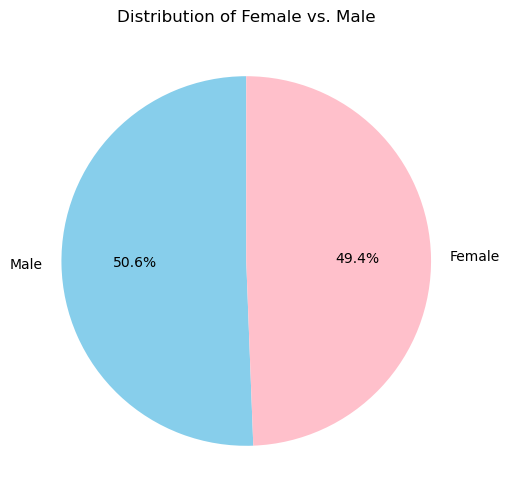

In [31]:

import matplotlib.pyplot as plt

mouse = pd.read_csv('Mouse_metadata.csv')
study = pd.read_csv('Study_results.csv')
merged_df = pd.merge(mouse, study, on='Mouse ID', how='left')

sex_counts = merged_df['Sex'].value_counts()


plt.figure(figsize=(6, 6)) 
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])


plt.title('Distribution of Female vs. Male')


plt.show()


In [33]:
import pandas as pd

target_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

filtered_df = merged_df[merged_df['Drug Regimen'].isin(target_regimens)]


last_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()


final_tumor_volume = pd.merge(last_timepoints, merged_df, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume = final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]


print(final_tumor_volume)


   Mouse ID Drug Regimen  Tumor Volume (mm3)
0      a203    Infubinol           67.973419
1      a251    Infubinol           65.525743
2      a275     Ceftamin           62.999356
3      a411     Ramicane           38.407618
4      a444     Ramicane           43.047543
..      ...          ...                 ...
95     y769     Ceftamin           68.594745
96     y793    Capomulin           31.896238
97     y865     Ceftamin           64.729837
98     z578     Ramicane           30.638696
99     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [39]:
import pandas as pd

mouse = pd.read_csv('Mouse_metadata.csv')
study = pd.read_csv('Study_results.csv')
merged_df = pd.merge(mouse, study, on='Mouse ID', how='left')

tumor_volume_data = merged_df['Tumor Volume (mm3)']

Q1 = tumor_volume_data.quantile(0.25)
Q3 = tumor_volume_data.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Q1: 45.0
Q3: 56.29220039
IQR: 11.292200389999998
Lower Bound: 28.061699415000003
Upper Bound: 73.230500975


In [4]:
import pandas as pd

mouse = pd.read_csv('Mouse_metadata.csv')
study = pd.read_csv('Study_results.csv')
merged_df = pd.merge(mouse, study, on='Mouse ID', how='left')


grouped_df = merged_df.groupby('Mouse ID').agg({'Timepoint': 'max'}).reset_index()

new_df = pd.merge(grouped_df, merged_df, on=['Mouse ID', 'Timepoint'], how='inner')

treatment_list = new_df['Drug Regimen'].unique()
tumor_volume_data = []

for drug in treatment_list:
    drug_data = new_df.loc[new_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_volume_data.append(drug_data)

for idx, drug in enumerate(treatment_list):
    quartiles = tumor_volume_data[idx].quantile([0.25, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    outliers = tumor_volume_data[idx][(tumor_volume_data[idx] < lower_bound) | (tumor_volume_data[idx] > upper_bound)]
    
    print(f"Drug: {drug}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential outliers: {outliers.tolist()}")
    print("------------")


Drug: Infubinol
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential outliers: [36.3213458]
------------
Drug: Placebo
Lower Bound: 30.15582196999999
Upper Bound: 90.92136789000001
Potential outliers: []
------------
Drug: Ceftamin
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential outliers: []
------------
Drug: Stelasyn
Lower Bound: 27.53557243999998
Upper Bound: 94.04496758000002
Potential outliers: []
------------
Drug: Zoniferol
Lower Bound: 24.77952216500001
Upper Bound: 92.00293628499998
Potential outliers: []
------------
Drug: Ramicane
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential outliers: []
------------
Drug: Ketapril
Lower Bound: 36.99186244000001
Upper Bound: 89.60048379999998
Potential outliers: []
------------
Drug: Propriva
Lower Bound: 28.95110303500001
Upper Bound: 82.742745555
Potential outliers: []
------------
Drug: Naftisol
Lower Bound: 25.85334408499999
Upper Bound: 95.78978676500002
Potential outlier

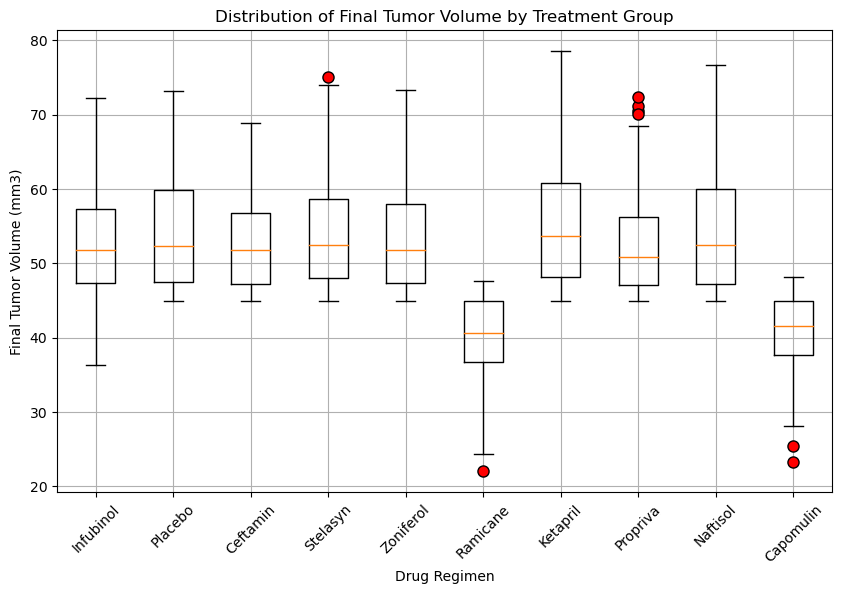

In [5]:
import matplotlib.pyplot as plt

tumor_volume_data = [merged_df.loc[merged_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)'].values for drug in treatment_list]

plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatment_list, showfliers=True, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8, 'linestyle': 'none'})
plt.title('Distribution of Final Tumor Volume by Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


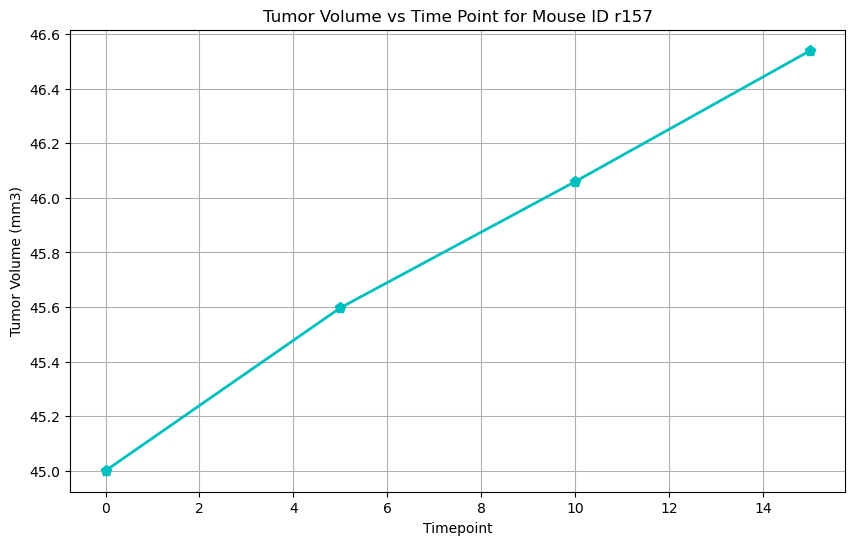

In [15]:
import pandas as pd

mouse = pd.read_csv('Mouse_metadata.csv')
study = pd.read_csv('Study_results.csv')
merged_df = pd.merge(mouse, study, on='Mouse ID', how='left')


import matplotlib.pyplot as plt


mouse_data = merged_df[merged_df['Mouse ID'] == 'r157']

plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='p', color='c', linestyle='-', linewidth=2, markersize=8)
plt.title('Tumor Volume vs Time Point for Mouse ID r157')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()
import pandas as pd

mouse = pd.read_csv('Mouse_metadata.csv')
study = pd.read_csv('Study_results.csv')
merged_df = pd.merge(mouse, study, on='Mouse ID', how='left')

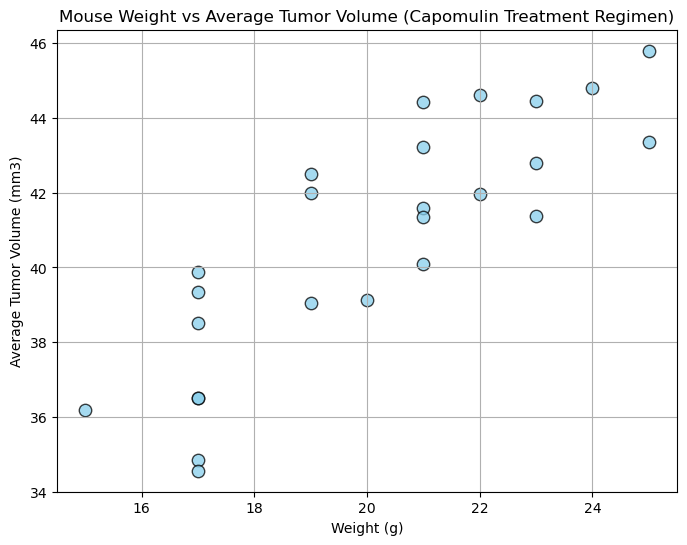

In [19]:
import pandas as pd

mouse = pd.read_csv('Mouse_metadata.csv')
study = pd.read_csv('Study_results.csv')
merged_df = pd.merge(mouse, study, on='Mouse ID', how='left')


import matplotlib.pyplot as plt

capomulin_data = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

grouped_capomulin_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'}).reset_index()

plt.figure(figsize=(8, 6))
plt.scatter(grouped_capomulin_data['Weight (g)'], grouped_capomulin_data['Tumor Volume (mm3)'], color='skyblue', edgecolors='black', s=80, alpha=0.75)
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin Treatment Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()


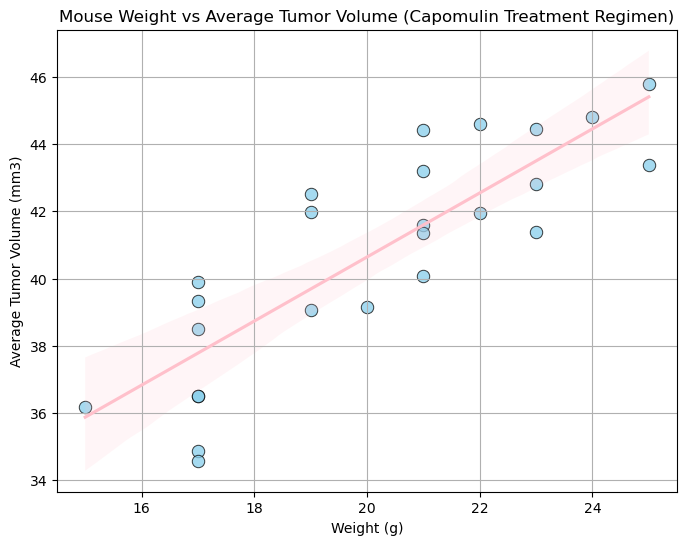

In [21]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Weight (g)', y='Tumor Volume (mm3)', data=grouped_capomulin_data, color='skyblue', edgecolor='black', s=80, alpha=0.75)

sns.regplot(x='Weight (g)', y='Tumor Volume (mm3)', data=grouped_capomulin_data, color='pink', scatter=False)

plt.title('Mouse Weight vs Average Tumor Volume (Capomulin Treatment Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()
